### Визуализация : Работа с изображениями [Домашнее задание]
> **Вы должны импортировать все необходимые пакеты самостоятельно.**

> **Пишите код только там, где это показано для записи. Не удаляйте комментарии!**
 

### Шаг 1

Импортируйте все необходимые пакеты, чтобы получить ожидаемые результаты.

In [20]:
#Начало вашего кода
from PIL import Image
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
#Конец вашего кода
print(os)
print(np)
print(Image)
print(cv2)

<module 'os' from 'D:\\able\\lib\\os.py'>
<module 'numpy' from 'D:\\able\\lib\\site-packages\\numpy\\__init__.py'>
<module 'PIL.Image' from 'D:\\able\\lib\\site-packages\\PIL\\Image.py'>
<module 'cv2' from 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages\\cv2\\__init__.py'>


### Ожидаемый результат:

```
<module 'os' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/os.py'>
<module 'numpy' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/numpy/__init__.py'>
<module 'PIL.Image' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/PIL/Image.py'>
<module 'cv2.cv2' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/cv2/cv2.cpython-36m-darwin.so'>
```

Пожалуйста, реализуйте функцию ```load_image_pil(filename=None)```, которая будет читать изображения и возвращать объект ```ndarray```. Вы должны использовать пакет ```pillow```, чтобы прочитать изображение.

In [25]:
def load_image_pil(filename=None):
    #Начало вашего кода
    if os.path.exists(filename):
        img_pil = Image.open(filename)
    else:
        print(f'{filename} does not exist')
        return None
    return img_pil

    #Конец вашего кода

img_pil=load_image_pil("./dog.jpeg")
print(img_pil)

./dog.jpeg does not exist
None


### Ожидаемый результат:

```
./dog.jpeg does not exist
None
```


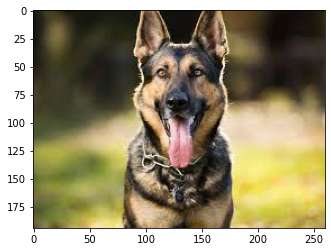

In [26]:
img_pil=load_image_pil("./dog1.jpeg")
plt.imshow(img_pil);
#Начало вашего кода

#Конец вашего кода

### Ожидаемый результат:

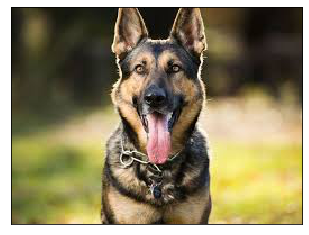


Пожалуйста, реализуйте функцию ```load_image_cv(filename=None)```, которая будет читать изображения и возвращать объект ```ndarray```. Вы должны использовать пакет ```cv2```, чтобы прочитать изображение.

In [31]:
def load_image_cv(filename=None):
    #Начало вашего кода
    if os.path.exists(filename):
        img_cv = cv2.imread(filename)
        img_cv =cv2.cvtColor(img_cv,cv2.COLOR_BGR2RGB)
        return img_cv
    else:
        print(f'{filename} does not exist')
        return None

    #Конец вашего кода

img_cv=load_image_cv("./dog.jpeg")
print(img_cv)

./dog.jpeg does not exist
None


### Ожидаемый результат:

```
./dog.jpeg does not exist
None
```

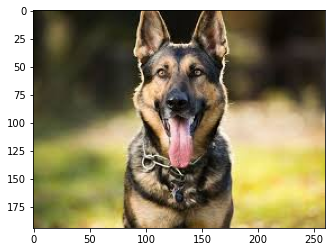

In [32]:
img_cv=load_image_cv("./dog1.jpeg")

plt.imshow(img_cv);
#Начало вашего кода

#Конец вашего кода

### Ожидаемый результат:

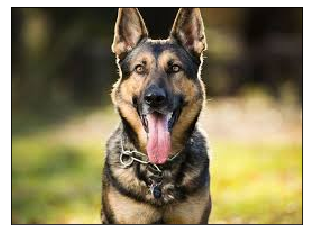

### Шаг 2

Пожалуйста, реализуйте функцию ```random_crop(img, width=None, height=None, seed=1)```, которая будет обрезать изображение требуемой ширины и высоты из входного аргумента ```img```. Важно отметить, что есть входной аргумент ```seed```, который используется для задания ```np.random.seed()``` при генерации координат левого верхнего угла обрезки.

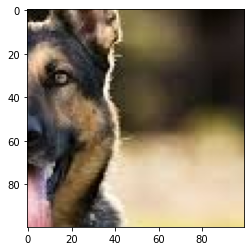

In [46]:
def random_crop(img, width=None, height=None, seed=1):
    #Начало вашего кода
    np.random.seed(seed)
    #import random
    
    if isinstance(img, np.ndarray):
        shape = img.shape
        row_number = shape[0]
        col_number = shape[1]

        random_start_row = np.random.randint(0, row_number-height)
        random_start_col = np.random.randint(0, col_number-width)
        img_cropped = img[random_start_row:random_start_row+height,random_start_col:random_start_col+width]
        return img_cropped
    else:
        return -1

    #Конец вашего кода

plt.imshow(random_crop(img_cv,width=100,height=100,seed=3));
#Начало вашего кода

#Конец вашего кода

### Ожидаемый результат:

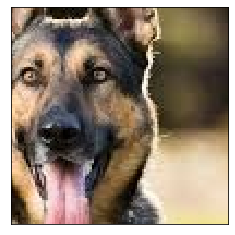

### Шаг 3

Пожалуйста, реализуйте функцию ```plot_random_grid(img,num_rows=2,num_cols=2,width=100,height=100)```, которая отображает фигуру случайно обрезанных изображений из входного аргумента ```img```. Чтобы обрезать изображение, используйте ранее реализованную функцию. Все обрезанные изображения должны иметь одинаковую высоту и ширину и равны соответствующим входным аргументам. Важно отметить, что ```seed``` изменяется при каждом вызове функции ```random_crop()```, начиная с ```1``` и заканчивая ```num_rows * num_cols```.
Пожалуйста, посмотрите на ожидаемый результат для лучшего понимания.

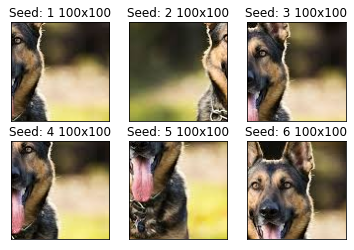

In [67]:
def plot_random_grid(img,num_rows=2,num_cols=2,width=100,height=100):
    #Начало вашего кода
    
    
    fig, axs = plt.subplots(num_rows, num_cols)
    seed = 1

    for i in range(num_rows * num_cols):
        img_cv = random_crop(img=img, width=width, height=height, seed=seed)
        row, col = np.unravel_index(i, (num_rows, num_cols))
        axs[row, col].imshow(img_cv)
        axs[row, col].set_xticks([])
        axs[row, col].set_yticks([])
        axs[row, col].set_title(f'Seed: {seed} {width}x{height}')
        seed += 1

    #plt.tight_layout()
    plt.show()
    
    
    

    #Конец вашего кода

plot_random_grid(img_cv,num_rows=2,num_cols=3,width=100,height=100)

### Ожидаемый результат:

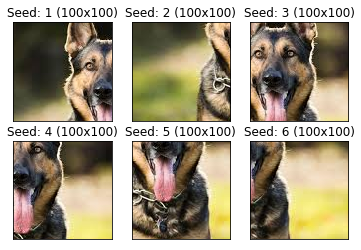

### Шаг 4


Пожалуйста, реализуйте функцию ```plot_grid(img,num_rows=2,num_cols=2)```, которая будет разбивать входное изображение img на изображения ```num_rows x num_cols```, а затем отображать график. Пожалуйста, посмотрите на ожидаемый результат для лучшего понимания.

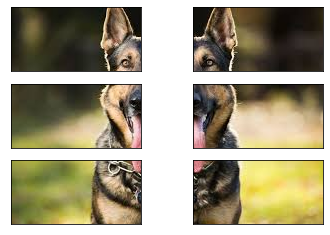

In [79]:
def plot_grid(img,num_rows=2,num_cols=2):
    #Начало вашего кода
    fig, axs = plt.subplots(num_rows, num_cols)
    seed = 1
    shape = img.shape
    row_number = shape[0]
    col_number = shape[1]
    width = col_number // num_cols
    height = row_number // num_rows
    start_row = 0
    start_col = 0
    for i in range(num_rows*num_cols):
        row, col = np.unravel_index(i, (num_rows, num_cols))
        
        #next_start_col = start_col+width
        try:
            img_cv = img[start_row:start_row+height,start_col:start_col+width]
            axs[row, col].imshow(img_cv)
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
            #axs[row, col].set_title(f'{seed}')
            #start_row = start_row+height
            start_col = start_col+width
        except Exception:
            start_row = start_row+height
            start_col = 0
            img_cv = img[start_row:start_row+height,start_col:start_col+width]
            axs[row, col].imshow(img_cv)
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
            #axs[row, col].set_title(f'{seed}')
            start_col=start_col+width
            continue
        
    plt.show()

    #Конец вашего кода

plot_grid(img_cv,3,2)

### Ожидаемый результат:

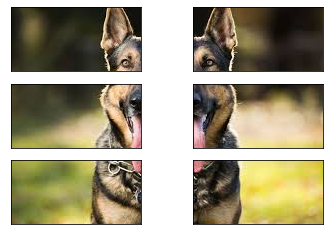

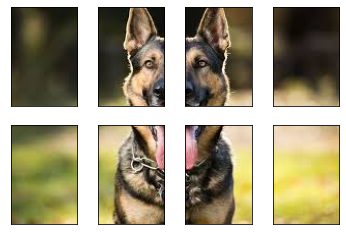

In [80]:
plot_grid(img_cv,2,4)

### Ожидаемый результат:

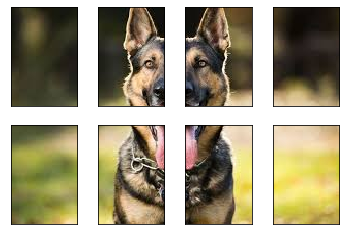

### Шаг 5

Пожалуйста, реализуйте функцию ```mirror_image(img)```, которая будет принимать входное изображение ```img``` и делать из него зеркальное отображение. Наконец, функция отображает эти два изображения на одном рисунке.


**Подсказка:** вам нужно использовать функции ```np.rot90()``` и ```cv2.cvtColor()``` для выполнения этого шага.

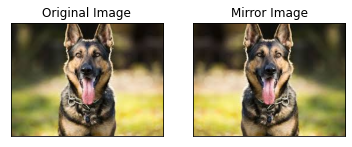

In [103]:
def mirror_image(img):
    #Начало вашего кода
    fig, axs = plt.subplots(1,2)
    img_mirrored = img[:, ::-1]
    #img_mirrored= np.rot90(img, axes=(0,1))
    axs[0].imshow(img)
    axs[0].set_title('Original Image')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].imshow(img_mirrored) 
    axs[1].set_title('Mirror Image')
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    plt.show()

    #Конец вашего кода

mirror_image(img_cv)

### Ожидаемый результат:

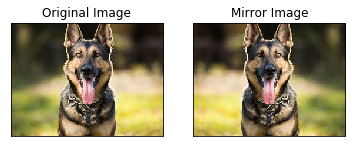

# Прекрасная работа!